<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%5B1%EC%B0%A8%5D_%ED%94%84%EB%A0%8C%EC%A6%884%EB%B8%94%EB%A1%9D(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - [1차] 프렌즈4블록
https://school.programmers.co.kr/learn/courses/30/lessons/17679

## 문제 설명

블라인드 공채를 통과한 신입 사원 라이언은 신규 게임 개발 업무를 맡게 되었다. 이번에 출시할 게임 제목은 "프렌즈4블록".
같은 모양의 카카오프렌즈 블록이 2×2 형태로 4개가 붙어있을 경우 사라지면서 점수를 얻는 게임이다.

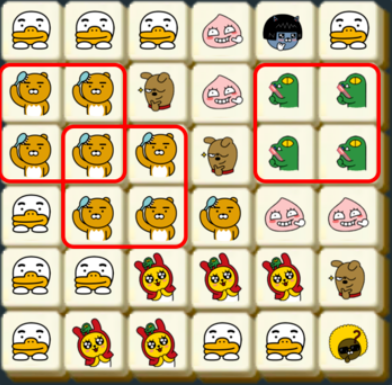

만약 판이 위와 같이 주어질 경우, 라이언이 2×2로 배치된 7개 블록과 콘이 2×2로 배치된 4개 블록이 지워진다. 같은 블록은 여러 2×2에 포함될 수 있으며, 지워지는 조건에 만족하는 2×2 모양이 여러 개 있다면 한꺼번에 지워진다.

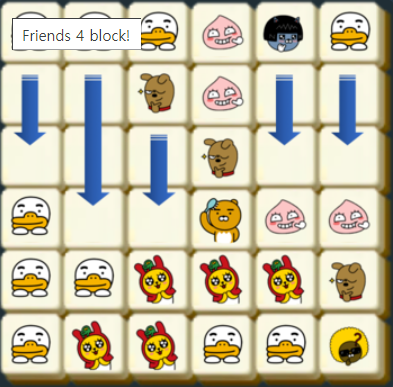

블록이 지워진 후에 위에 있는 블록이 아래로 떨어져 빈 공간을 채우게 된다.

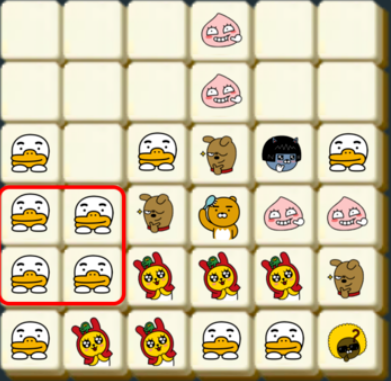

만약 빈 공간을 채운 후에 다시 2×2 형태로 같은 모양의 블록이 모이면 다시 지워지고 떨어지고를 반복하게 된다.

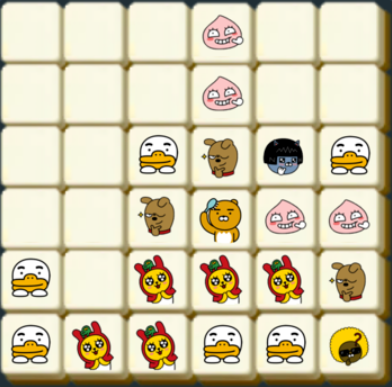

위 초기 배치를 문자로 표시하면 아래와 같다.

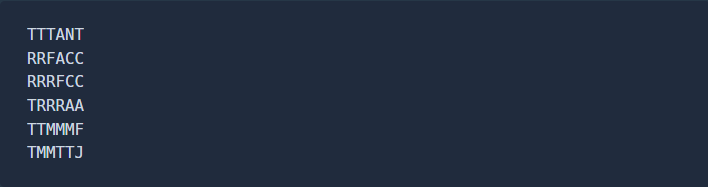

각 문자는 라이언(R), 무지(M), 어피치(A), 프로도(F), 네오(N), 튜브(T), 제이지(J), 콘(C)을 의미한다

입력으로 블록의 첫 배치가 주어졌을 때, 지워지는 블록은 모두 몇 개인지 판단하는 프로그램을 제작하라.

## 입력 형식

- 입력으로 판의 높이 m, 폭 n과 판의 배치 정보 board가 들어온다.
- 2 ≦ n, m ≦ 30
- board는 길이 n인 문자열 m개의 배열로 주어진다. 블록을 나타내는 문자는 대문자 A에서 Z가 사용된다.

## 출력 형식

입력으로 주어진 판 정보를 가지고 몇 개의 블록이 지워질지 출력하라.

## 입출력 예제

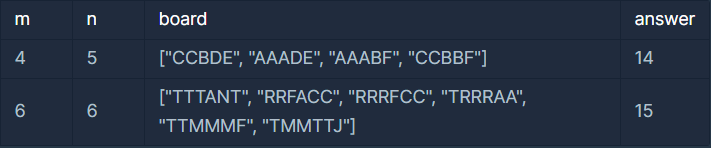

## 예제에 대한 설명

- 입출력 예제 1의 경우, 첫 번째에는 A 블록 6개가 지워지고, 두 번째에는 B 블록 4개와 C 블록 4개가 지워져, 모두 14개의 블록이 지워진다.
- 입출력 예제 2는 본문 설명에 있는 그림을 옮긴 것이다. 11개와 4개의 블록이 차례로 지워지며, 모두 15개의 블록이 지워진다.

## 첫 번째 방법

1. 블록이 더이상 지워지지 않을 때까지 while문을 통해 블록을 지움.
2. board와 똑같은 크기의 zero_list를 0으로 초기화.
3. board를 순차적으로 탐색해 해당 원소를 포함한 기준으로 인접한 원소 4개가 자기자신과 같을 때 0board의 위치와 똑같은 zero_list에 1을 저장.
4. 변수 cnt에 zero_list의 존재하는 1을 모두 더해 저장.
5. answer에 cnt를 저장하고 cnt가 0일 때 반복문을 종료.
6. 블록이 사라지고 위에 있는 블록을 아래로 채우기 위해 idx를 0으로 초기화하고 zero_list에 존재하는 1의 위치를 파악. whilel문으로 그 후 1의 인덱스 기준 위쪽에 또 1이 오지 않을 때까지 idx를 1씩 빼줌.
7. board[i][j]에 board[idx][j]를 저장해주고 zero_list[idx][j]에 1을 저장 후 answer을 return.

결과 : 실패

-> board를 문자마다 분리하지 않고 while문을 진행해 마지막 while문에서 문자를 바꾸지 못함.

In [ ]:
def solution(m, n, board):
    answer = 0
    
    while True:
        zero_list = [[0 for _ in range(n)] for _ in range(m)]
        for i in range(m - 1):
            for j in range(n - 1):
                if board[i][j] != 0 and board[i][j] == board[i][j + 1] and board[i][j] == board[i + 1][j] and board[i][j] == board[i + 1][j + 1]:
                    zero_list[i][j], zero_list[i][j + 1], zero_list[i + 1][j], zero_list[i + 1][j + 1] = 1, 1, 1, 1
        cnt = 0
        for i in range(m):
            cnt += sum(zero_list[i])
        answer += cnt
        if cnt == 0:
            break

        for i in range(m - 1, -1, -1):
            for j in range(n):
                if zero_list[i][j] == 1:
                    idx = i - 1
                    while idx >= 0 and zero_list[idx][j] == 1:
                        idx -= 1
                    if idx < 0:
                        board[i][j] = 0
                    else:
                        board[i][j] = board[idx][j]
                        zero_list[idx][j] = 1

    return answer

solution(4, 5, ["CCBDE", "AAADE", "AAABF", "CCBBF"])

## 두 번째 방법
첫 번째 방법에서 입력받은 board의 문자열을 문자마다 하나하나 쪼개 다시 board에 저장.

결과 : 성공

In [14]:
def solution(m, n, board):
    answer = 0
    for i in range(len(board)):
        board[i] = list(board[i])
        
    while True:
        zero_list = [[0 for _ in range(n)] for _ in range(m)]
        for i in range(m - 1):
            for j in range(n - 1):
                if board[i][j] != 0 and board[i][j] == board[i][j + 1] and board[i][j] == board[i + 1][j] and board[i][j] == board[i + 1][j + 1]:
                    zero_list[i][j], zero_list[i][j + 1], zero_list[i + 1][j], zero_list[i + 1][j + 1] = 1, 1, 1, 1
        cnt = 0
        for i in range(m):
            cnt += sum(zero_list[i])
        answer += cnt
        if cnt == 0:
            break

        for i in range(m - 1, -1, -1):
            for j in range(n):
                if zero_list[i][j] == 1:
                    idx = i - 1
                    while idx >= 0 and zero_list[idx][j] == 1:
                        idx -= 1
                    if idx < 0:
                        board[i][j] = 0
                    else:
                        board[i][j] = board[idx][j]
                        zero_list[idx][j] = 1

    return answer

solution(4, 5, ["CCBDE", "AAADE", "AAABF", "CCBBF"])

14